K-fold CV (K = 5) mean accuracy: 0.0397 ± 0.00002057
K-fold CV (K = 10) mean accuracy: 0.0390 ± 0.00000333
K-fold CV (K = 20) mean accuracy: 0.0396 ± 0.00000229


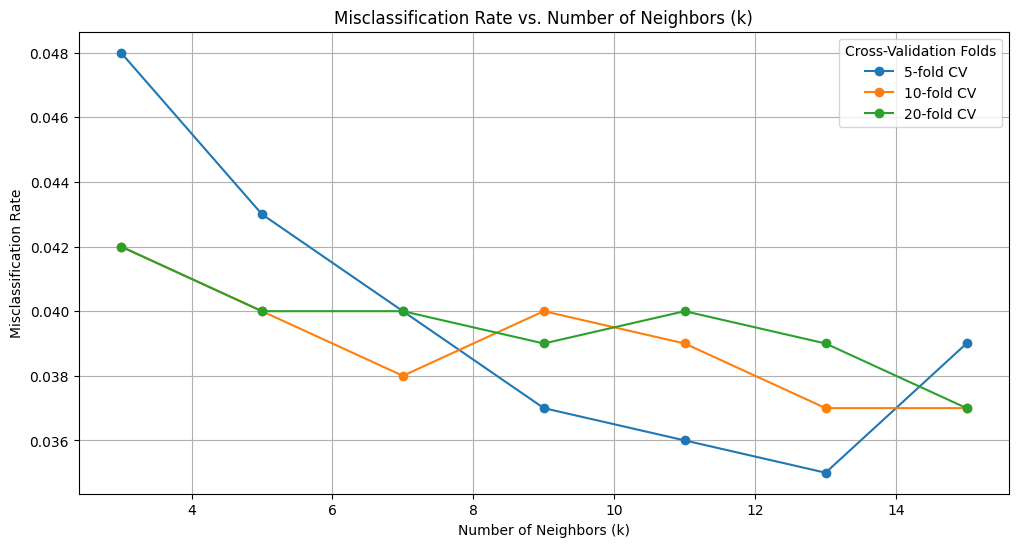

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=10, n_classes = 7, n_clusters_per_class=1, n_informative=3, random_state=42)

data = pd.DataFrame(np.c_[y, X])

y = data.iloc[:, 0]
X = data.iloc[:, 1:]

# Set random seed for reproducibility
np.random.seed(1)

# List of k values to try
ks = [3, 5, 7, 9, 11, 13, 15]

# List of k-fold values to try
k_folds = [5, 10, 20]

# Dictionary to hold the results
results_plot = {}

# Function to perform k-NN and calculate misclassification rate
def knn_misclassification(X, y, k_fold, k):
    cv = KFold(n_splits=k_fold, shuffle=True, random_state=1)
    idx = list(cv.split(data))
    
    res_k = []
    for train_index, test_index in idx:
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        
        misclassification_rate = 1 - accuracy_score(y_test, pred)
        res_k.append(misclassification_rate)
    
    return np.mean(res_k)
    
# Apply k-NN for each k and each k-fold, and store the results
for k_fold in k_folds:
    res = [knn_misclassification(X, y, k_fold, k) for k in ks]
    results_plot[k_fold] = res

# Print the results
print(f"K-fold CV (K = 5) mean accuracy: {statistics.mean(results_plot[5]):.4f} ± {statistics.variance(results_plot[5]):.8f}")
print(f"K-fold CV (K = 10) mean accuracy: {statistics.mean(results_plot[10]):.4f} ± {statistics.variance(results_plot[10]):.8f}")
print(f"K-fold CV (K = 20) mean accuracy: {statistics.mean(results_plot[20]):.4f} ± {statistics.variance(results_plot[20]):.8f}")

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

for k_fold in k_folds:
    ax.plot(ks, results_plot[k_fold], marker='o', label=f'{k_fold}-fold CV')

ax.set_title('Misclassification Rate vs. Number of Neighbors (k)')
ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Misclassification Rate')
ax.legend(title='Cross-Validation Folds')
plt.grid(True)
plt.show()